# <center> 2. Логистическая регрессия

Задача классификации (classification) — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является категориальным.
Когда классов, которые мы хотим предсказать, только два, классификация называется бинарной. 
Когда классов, которые мы хотим предсказать, более двух, классификация называется мультиклассовой (многоклассовой).
Модели, которые решают задачу классификации, называются классификаторами (classifier).
логистической регрессии — регрессии вероятностей.

### ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Логистическая регрессия (Logistic Regression) — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция (logistic function) sigma(z), название этой функции — сигмόида (sigmoid).
sigma(z)=1/(1+e**-z)

У сигмоиды есть два очень важных для нас свойства:

Значения сигмоиды  sigma(z) лежат в диапазоне от 0 до 1 при любых значения аргумента z: какой бы z вы ни подставили, число меньше 0 или больше 1 вы не получите.
Сигмоида выдаёт значения sigma(z)>0.5 при её аргументе z>0, sigma(z)<0.5 при z<0> и sigma(z)*0.5 — при z=0.

Основная идея модели логистической регрессии: возьмём модель линейной регрессии (обозначим её выход за z)
z = w0 + summa(wj*xj)

функцию сигмоиды:
P^ = sigma(z) = 1/(1+e**(-w0 - summa(wj*xj)))

y^ = I[P^]

В данном выражении I[P^] называется индикаторной функцией. Она возвращает 1, если её значение больше какого-то порога, и 0 — в противном случае. Математики часто записывают просто квадратные скобки, опуская символ I:[P^] .

Если мы обучим модель, то есть подберём  коэффициенты w0, w1...wm (как их найти, обсудим чуть позже) таким образом, что для объектов класса 1 модель линейной регрессии начнёт выдавать положительное число, а для класса 0 — выдавать отрицательное число, то тогда, подставив предсказание линейной регрессии z в сигмоиду, мы сможем получать вероятности принадлежности к каждому из классов в диапазоне от 0 до 1.
Далее по порогу вероятности мы сможем определять, к какому классу принадлежит объект.

Ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется отступом (margin). Чем больше расстояние от точки, находящейся выше разделяющей плоскости, до самой плоскости, тем больше оценка вероятности принадлежности к классу 1.

В общем случае, когда у нас есть зависимость от m факторов, линейное выражение, находящееся под сигмоидой, будет обозначать разделяющую гиперплоскость.

### ПОИСК ПАРАМЕТРОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

метод максимального правдоподобия (Maximum Likelihood Estimation — MLE). 
Правдоподобие — это оценка того, насколько вероятно получить истинное значение целевой переменной y при данных x и параметрах w.
Цель метода — найти такие параметры w=(w0...wm), в которых наблюдается максимум функции правдоподобия. Подробнее о выводе формулы https://habr.com/ru/post/485872/. 

likelihood = summa(yi*log(P^i) + (1-yi)*log(1-P^i)) -> maxw,                summa ot i do n

n — количество наблюдений.
yi — это истинный класс (1 или 0) для i-ого объекта из набора данных.
P^i = sigma(zi) — предсказанная с помощью логистической регрессии вероятность принадлежности к классу 1 для i-ого объекта из набора данных.
zi — результат подстановки -ого объекта из набора данных в уравнение разделяющей плоскости zi = w_*x_i.
log — логарифм (обычно используется натуральный логарифм по основанию e - ln).

К сожалению, функция likelihood не имеет интерпретации, то есть нельзя сказать, что значит число 2.34 в контексте правдоподобия. Цель — найти такие параметры, при которых наблюдается максимум этой функции.

Теперь пора снова применить магию математики, чтобы привести задачу к привычному нам формату минимизации эмпирического риска. По правилам оптимизации, если поставить перед функцией минус, то задача оптимизации меняется на противоположную: был поиск максимума — станет поиском минимума.

Таким образом мы получим функцию потерь L(w), которая носит название «функция логистических потерь», или logloss. Также часто можно встретить название кросс-энтропия, или cross-entropy loss:

L(w) = logloss = -summa(yi * log(P^i) + (1-yi) * log(1-P^i)) -> minw

p^i = 1/(1 + e**(-w0 - summa(wj*xj)))

Вот эту функцию мы и будем минимизировать в рамках поиска параметров логистической регрессии. Мы должны найти такие параметры разделяющей плоскости  , при которых наблюдается минимум logloss.
для такой функции потерь аналитическое решение оптимизационной задачи найти не получится: при расчётах получается, что его попросту не существует.

для поиска параметров можно использовать градиентный спуск
Мы уже знаем, что для того, чтобы повысить шанс пройти мимо локальных минимумов функции потерь, используется не сам градиентный спуск, а его модификации: например, можно использовать стохастический градиентный спуск (SGD).



Во избежание переобучения модели в функцию потерь логистической регрессии традиционно добавляется регуляризация.
При L1-регуляризации мы добавляем в функцию потерь L(w) штраф из суммы модулей параметров, а саму функцию logloss умножаем на коэффициент C:
L(w) = C * logloss + summa(|wj|) -> minw

А при L2-регуляризации — штраф из суммы квадратов параметров:
L(w) = C * logloss + summa(wj**2) -> minw

Значение коэффициента C — коэффициент, обратный коэффициенту регуляризации. Чем больше C, тем меньше «сила» регуляризации.

In [12]:
#задание 2.9

import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI - от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец - reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаем фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость - линия, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даем графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легену в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))
    
df = pd.read_csv('/home/aleksandr/Документы/GitHub/data/Misc_data/task_data.csv')
X = df[['X_1', 'X_2']]
y = df['y']

log_reg = linear_model.LogisticRegression(solver='sag', random_state=42)
log_reg.fit(X, y)

plot_probabilities_2d(X, y, log_reg)

# <center> 3. Метрики классификации. Мультиклассовая классификация

### МЕТРИКИ КЛАССИФИКАЦИИ

Матрица ошибок (confusion matrix) показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

класс 1 положительным исходом (positive), а класс 0 — отрицательным исходом (negative).

Матрице соответствуют четыре возможных исхода классификации:

True Positive (TP) — количество ответов, обозначенных моделью как класс 1 (y^=1) и действительно являющихся классом 1 (y=1).
False Positive (FP) — количество ответов, обозначенных моделью как класс 1 (y^=1), но в действительности являющихся классом 0 (y=0).
False Negative (FN) — количество ответов, обозначенных моделью как класс 0 (y^=0), но в действительности являющихся классом 1 (y=1).
True Negative (TN) — количество ответов, обозначенных моделью как класс 0 (y^=0) и действительно являющихся классом 0 (y=0).

**На основе матрицы ошибок составляются следующие метрики классификации:**

- Accuracy (достоверность) — доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (True Positive) и истинно отрицательные ответы (True Negative):
accuracy = (TP+TN) / (TP+TN+FN+FP)
Интерпретация: как много (в долях) модель угадала ответов.
Accuracy — бесполезна, если классы сильно несбалансированы.
функция в sklearn - accuracy_score()

- Precision (точность), или PPV (Positive Predictive Value) — это доля объектов, которые действительно являются положительными, по отношению ко всем объектам, названным моделью положительными. Способность модели отделять класс 1 от класса 0.
Можно использовать на несбалансированных выборках.
precision = TP/(TP+FP)
Интерпретация: способность отделить класс 1 от класса 0. Чем больше precision, тем меньше ложных попаданий. 
Precision нужен в задачах, где от нас требуется минимум ложных срабатываний. Чем выше «цена» ложноположительного результата, тем выше должен быть precision.
Например, по камерам видеонаблюдения мы автоматически выявляем признаки драки на улицах и отправляем наряд полиции
Вычисляется только для положительного класса — класса 1. Для класса 0 показатель необходимо вычислять отдельно. Не даёт представления о том, как много объектов положительного класса из общей совокупности нашёл алгоритм.
функция в sklearn - precision_score()

- Recall (полнота), или TPR (True Positive Rate) — это доля объектов, названных классификатором положительными, по отношению ко всем объектам положительного класса.
recall = TP / (TP + FN)
Интерпретация: способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что ложные срабатывания не влияют на recall. 
Recall очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1. Можно использовать на несбалансированных выборках. Вычисляется только для положительного класса — класса 1. Для класса 0 показатель необходимо вычислять отдельно. Не даёт представления о том, насколько точно модель находит объекты положительного класса (как много ложных срабатываний).
Например, это различные диагностические задачи с серьёзными заболеваниями. 
функция в sklearn - recall_score()

на практике бывает так, что увеличение одной из метрик может привести к уменьшению другой.

- Fbeta(F-мера) — это взвешенное среднее гармоническое между precision и recall:
Fbeta = (1+beta**2) * precision*recall/(beta**2 * precision + recall)
beta - это вес precision в метрике: чем больше beta, тем больше вклад.
В частном случае, когда beta=1, мы получаем равный вклад для precision и recall, а формула будет выражать простое среднее гармоническое, или метрику F1
В чём преимущество F1-меры? Метрика равна своему максимуму (1), если и precision, и recall равны 1. Но если хотя бы одна из метрик равна 0, то и F1=0. 
метрика F1 используется в задачах, где необходимо выбрать модель, которая балансирует между precision и recall.
Даёт обобщённое представление о точности и полноте. Отсутствие интерпретации не даёт интуитивного понимания человеку, не знакомому с этой метрикой.
функция в sklearn - f1_score()

### ДОСТОИНСТВА И НЕДОСТАТКИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ 

Достоинства:
- Простой, интерпретируемый, но в то же время эффективный алгоритм. Благодаря этому он очень популярен в мире машинного обучения.
- Поиск параметров линейный или квадратичный (в зависимости от метода оптимизации), то есть ресурсозатратность алгоритма очень низкая.
- Не требует подбора внешних параметров (гиперпараметров), так как практически не зависит от них.

Недостатки:
Алгоритм работает хорошо, только когда классы линейно разделимы, что в реальных задачах бывает очень редко. Поэтому обычно данная модель используется в качестве baseline.

недостаток с линейной разделимостью классов можно побороть с помощью введения полиномиальных признаков, тем самым снизив смещение модели. Тогда логистическая регрессия вместо разделяющей плоскости будет означать выгнутую разделяющую поверхность сложной структуры. С этим трюком стоит быть аккуратным, так как можно получить переобученную модель. Поэтому в комбинации с полиномиальными признаками стоит подобрать наилучший параметр регуляризации.

### 4. Логистическая регрессия. Практика

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

In [2]:
churn_data = pd.read_csv('/home/aleksandr/Документы/GitHub/data/ML3/churn.csv')
churn_data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


RowNumber — номер строки таблицы;
CustomerId — идентификатор клиента;
Surname — фамилия клиента;
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
Geography — страна проживания клиента (банк межнациональный);
Gender — пол клиента;
Age — возраст клиента;
Tenure — сколько лет клиент пользуется банком;
Balance — сколько у клиента денег на счетах в банке;
NumOfProduct — число услуг банка, которые приобрёл клиент;
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
IsActiveMember — есть ли у клиента статус активного участника банка (1 — да, 0 — нет);
EstimatedSalary — предполагаемая заработная плата клиента;
Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

In [3]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 14)

In [4]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [9]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# BalanceSalaryRatio — отношение баланса на счетах к заработной плате клиента;
churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
# TenureByAge — отношение времени пользования банком к возрасту клиента;
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
# CreditScoreGivenAge — отношение кредитного рейтинга к возрасту клиента.
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/(churn_data['Age'])

# перекодируем единственный текстовый категориальный признак Gender
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [6]:
# Разделим набор данных на матрицу наблюдений X и столбец ответов y:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

In [7]:
# Проведём нормализацию матрицы наблюдений X:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# проверка сбалансированности данных 
y.value_counts(normalize=True)

In [9]:
# Выполним стратифицирование. То есть сделаем так, чтобы в тренировочной и тестовой выборках было одинаковое соотношение лояльных и ушедших клиентов. 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


In [10]:
# Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:
print('Train :', y_train.value_counts(normalize=True))
print('Test :', y_test.value_counts(normalize=True))

Train : 0    0.675704
1    0.324296
Name: Exited, dtype: float64
Test : 0    0.675159
1    0.324841
Name: Exited, dtype: float64


In [11]:
# Задание 4.2 Обучите модель логистической регрессии на тренировочных данных.
# Используйте в качестве алгоритма минимизации функции потерь (параметр solver) стохастический градиентный спуск.
# В качестве значения параметра random_state возьмите 42 для воспроизводимости результатов. Остальные параметры оставьте по умолчанию.
# Предскажите метки классов для тренировочной и тестовой выборок.# Чему равно значение целевой метрики на тренировочной и тестовой выборках?

log_reg = linear_model.LogisticRegression(
    solver='sag',
    random_state=42
)

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = log_reg.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1271
           1       0.63      0.40      0.49       610

    accuracy                           0.73      1881
   macro avg       0.69      0.64      0.65      1881
weighted avg       0.72      0.73      0.71      1881

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       424
           1       0.63      0.38      0.47       204

    accuracy                           0.72       628
   macro avg       0.69      0.63      0.64       628
weighted avg       0.71      0.72      0.70       628



In [12]:
# Задание 4.3 Сгенерируйте полиномиальные признаки степени 3 для тренировочной и тестовой выборок.
# Используйте класс PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.
# Чему равно количество признаков в тренировочной выборке?

poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print('Train shape: {}'.format(X_train_poly.shape))
print('Test shape: {}'.format(X_test_poly.shape))

Train shape: (1881, 454)
Test shape: (628, 454)


In [13]:
# Задание 4.4 Обучите модель логистической регрессии на полиномиальных признаках.
# Используйте в качестве алгоритма минимизации функции потерь (параметр solver) стохастический градиентный спуск.
# Параметру random_state выставите значение 42 для воспроизводимости результатов.
# Увеличьте максимальное количество итераций, выделяемых на сходимость (параметр max_iter), до 1000. Остальные параметры оставьте по умолчанию.
# Предскажите метки классов для тренировочной и тестовой выборок.

log_reg = linear_model.LogisticRegression(
    solver='sag',
    random_state=42, 
    max_iter=1000
)

log_reg.fit(X_train_poly, y_train)

y_train_pred = log_reg.predict(X_train_poly)
print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = log_reg.predict(X_test_poly)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1271
           1       0.78      0.56      0.66       610

    accuracy                           0.81      1881
   macro avg       0.80      0.74      0.76      1881
weighted avg       0.80      0.81      0.80      1881

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       424
           1       0.73      0.56      0.64       204

    accuracy                           0.79       628
   macro avg       0.77      0.73      0.75       628
weighted avg       0.79      0.79      0.78       628



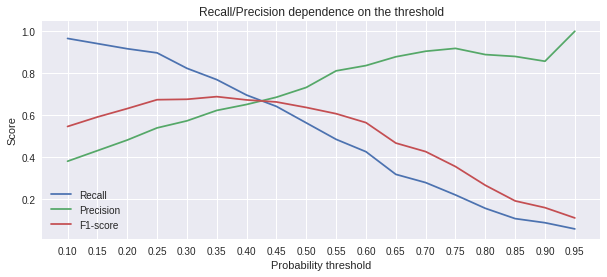

In [24]:
y_test_proba_pred = log_reg.predict_proba(X_test_poly)[:, 1]
y_test_proba_pred = pd.Series(y_test_proba_pred)

recall_scores = []
precision_scores = []
f1_scores = []
thresholds = np.arange(0.1, 1, 0.05)

for threshold in thresholds:
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

fig, ax = plt.subplots(figsize=(10, 4)) 
ax.plot(thresholds, recall_scores, label='Recall')
ax.plot(thresholds, precision_scores, label='Precision')

ax.plot(thresholds, f1_scores, label='F1-score')
ax.set_title('Recall/Precision/F-1 dependence on the threshold')
ax.set_xticks(thresholds) 
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.legend();

In [25]:
# Задание 4.6 Сделайте предсказание классов с подобранным оптимальным порогом вероятности. # Чему равно значение целевой метрики на тестовой выборке?
threshold_opt = 0.35
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       424
           1       0.62      0.77      0.69       204

    accuracy                           0.77       628
   macro avg       0.75      0.77      0.76       628
weighted avg       0.79      0.77      0.78       628



# <center> 5. Деревья решений

### ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ДЕРЕВЕ РЕШЕНИЙ

Если коротко, решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил. Этот процесс в некотором смысле согласуется с естественным для человека процессом принятия решений.

Успешнее всего деревья применяют в следующих областях:
- Банковское дело. Оценка кредитоспособности клиентов банка при выдаче кредитов.
- Промышленность. Контроль качества продукции (обнаружение дефектов в готовых товарах), испытания без нарушений (например, проверка качества сварки) и т. п.
- Медицина. Диагностика заболеваний разной сложности.
- Молекулярная биология. Анализ строения аминокислот.
- Торговля. Классификация клиентов и товара.

Формально структура дерева решений — это связный ациклический граф. Что это значит?
Граф — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер. Связный граф — это граф, в котором между любой парой существует направленная связь. Ациклический граф — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

В дереве решений можно выделить три типа вершин:
- Корневая вершина (root node) — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40».
- Внутренние вершины (intermediate nodes) — это дополнительные уточняющие вопросы, которые дерево задаёт объекту. 
- Листья (leafs) — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.

Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется максимальной глубиной дерева (max depth).
Логический критерий, который находится в каждой вершине, называется предикатом, или решающим правилом. Если результат предиката равен 1, то мы переходим по левой ветви дерева к следующему узлу, в противном случае — по правой ветви дерева к следующему узлу.

В каждом блоке указаны следующие данные:
- Предикат I[xj<=t] — условие, по которому выборка делится на две части: на ту, для которой условие выполняется, и ту, для которой не выполняется.
- gini — критерий информативности Джини, о котором мы поговорим чуть позже.
- samples — количество объектов, которые мы проверяем на данном шаге.
- value — распределение по классам для объектов, которые мы проверяем на данном шаге
- class — класс, который мы присваиваем, если завершим выполнение алгоритма на данном шаге.

### ПРОЦЕСС ПОСТРОЕНИЯ ДЕРЕВА РЕШЕНИЙ

алгоритм CART (Classification and Regression Tree) предназначен для построения бинарных деревьев решений (деревьев, у которых каждая вершина связана с двумя другими вершинами нижнего уровня). Данный алгоритм, как следует из его названия, предназначен для решения задач классификации и регрессии.

как работает алгоритм:
1. Создать новую вершину node. На первой итерации это будет корневая вершина. На последующих это будут внутренние вершины.
2. Проверить некоторый критерий остановки stop_criterion(). Например, критерием остановки может быть следующее условие: все объекты, которые попали в вершину, — это объекты одного и того же класса.
2.1. Если условие остановки выполняется: Проверить, какой класс преобладает в текущей вершине. Превратить текущую вершину дерева в лист, где всем наблюдениям, которые попали в эту вершину, присвоить метку преобладающего класса. Прекратить построение дерева, вернув из алгоритма полученный лист.
2.2 Если условие остановки не выполняется: Среди всех возможных предикатов Bv(x,t) = I[xj<=t] найти такой, который обеспечивает разбиение выборки наилучшим образом.

Вершина дерева node задаёт целое поддерево идущих за ним вершин, если такие имеются, а не только саму вершину.

### ПОИСК ПАРАМЕТРОВ ДЕРЕВА РЕШЕНИЙ

дерево решений — это топологический алгоритм, а не аналитический, то есть структуру дерева не получится описать в виде формулы, как те же линейные модели
полным перебором данных можно найти такую комбинацию j и t, которая обеспечит наилучшее уменьшение неопределённости.
Неопределённость можно измерять различными способами, в деревьях решений для этого используются энтропия Шеннона и критерий Джини. 

### ДЕРЕВЬЯ РЕШЕНИЙ В SKLEARN

In [2]:
diabetes_data = pd.read_csv('/home/aleksandr/Документы/GitHub/data/data Zadania 10-14/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


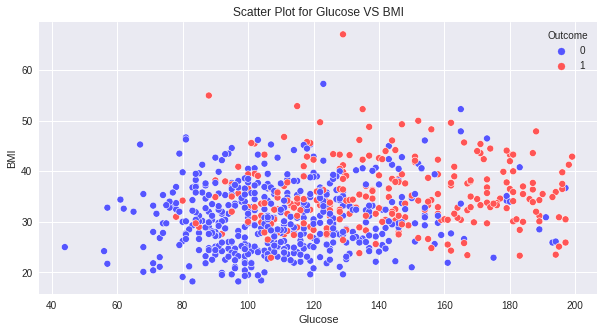

In [3]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
ax.set_title('Scatter Plot for Glucose VS BMI');

In [4]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

from sklearn import tree #модели деревьев решения

Основные параметры DecisionTreeClassifier:
- criterion — критерий информативности ('gini' — критерий Джини и 'entropy' — энтропия Шеннона).
- max_depth — максимальная глубина дерева (по умолчанию — None, глубина дерева не ограничена).
- max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве (по умолчанию — None, то есть обучение производится на всех признаках). Нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
- min_samples_leaf — минимальное число объектов в листе (по умолчанию — 1). У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те решающие правила, которые верны как минимум для пяти объектов.
- random_state — число, отвечающее за генерацию случайных чисел.

In [5]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности 
    max_depth=3, #максимальная глубина
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

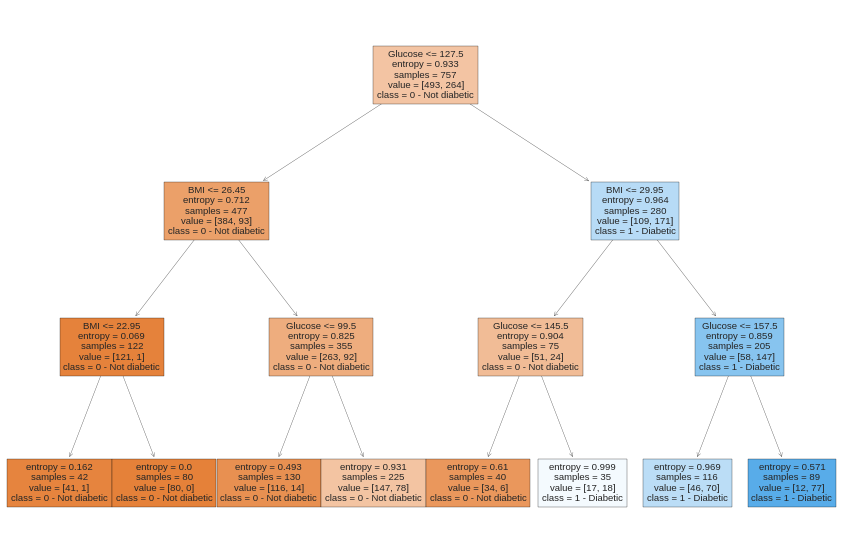

In [8]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree.plot_tree(
    dt_clf_2d, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

# Основные параметры функции:
# decision_tree — объект обученного дерева решений,
# feature_names — наименования факторов,
# class_names — названия классов,
# filled — добавлять ли расцветку вершин графа.

In [9]:
#Пример предсказания класса. Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = dt_clf_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

Predicted class: [1]


In [10]:
#Пример предсказания вероятности принадлежности к классу. Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей:
y_new_proba_predict = dt_clf_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 3)))

Predicted probabilities: [[0.135 0.865]]


In [11]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80. Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

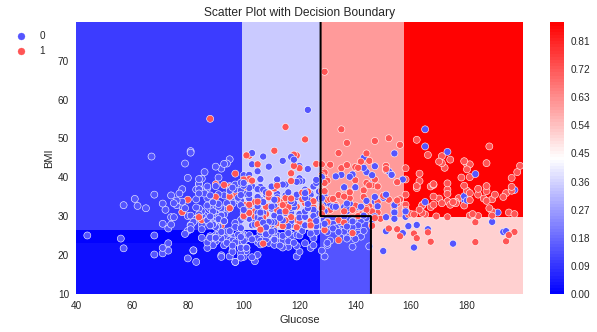

In [21]:
plot_probabilities_2d(X, y, dt_clf_2d)

In [22]:
#Делаем предсказание класса для всего набора данных при глубине max_depth =3
y_pred = dt_clf_2d.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



In [23]:
#Создаём объект класса DecisionTreeClassifier. Без ограничений max_depth
dt_clf_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
dt_clf_bad.fit(X, y)

#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_bad.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



In [24]:
#Создаём фигуру для визуализации графа. Дерево очень большое и модель переобучена

#fig = plt.figure(figsize=(15, 10)) 
#tree_graph = tree.plot_tree(
#    dt_clf_bad, #объект обученного дерева
#    feature_names=X.columns, #наименования факторов
#    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
#    filled=True, #расцветка графа
#);

# Глубина дерева
dt_clf_bad.get_depth()

22

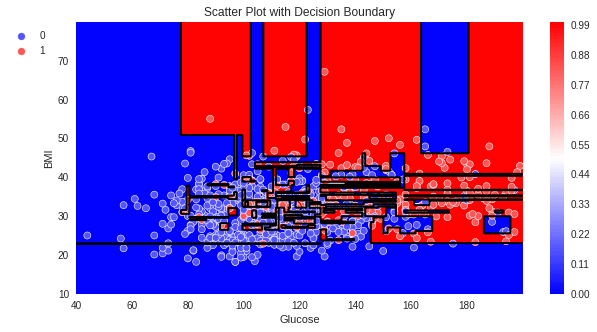

In [25]:
plot_probabilities_2d(X, y, dt_clf_bad)

Всегда используйте регуляризацию деревьев — ограничивайте их максимальную глубину (max_depth) и минимальное число объектов в листе (min_samples_leaf).

In [26]:
# Обучим дерево решений на всех признаках
# Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



дерево решений позволяет определить важность признаков, обратившись к атрибуту feature_importance_:

In [27]:
print(dt_clf_full.feature_importances_)

[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


In [ ]:
# Значения, которые будут выведены в качестве элементов массива, и есть коэффициенты важности каждого из признаков.
# Для удобства обычно строят столбчатую диаграмму:

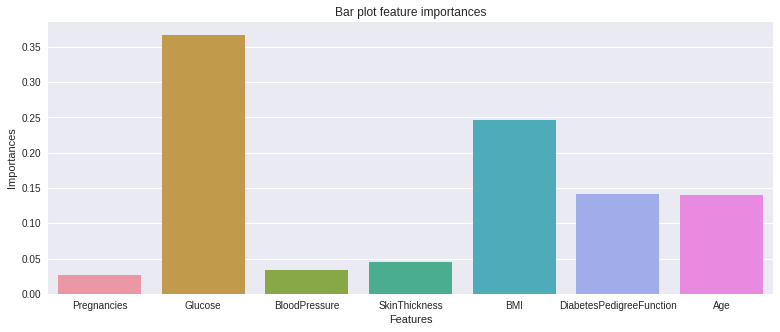

In [28]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = dt_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

Часто «древесные» модели используются в качестве методов для отбора наиболее важных признаков. Это важно, когда в вашем наборе данных большое количество признаков, из-за которых обучение более сложных моделей может стать очень длительным. 

Значимость признаков можно использовать в рамках анализа бизнес-процессов. Значимость позволяет понять, на какие признаки стоит обратить наибольшее внимание, чтобы повысить, точность их измерения.

In [29]:
# Задание 5.10  Обучите дерево решений с максимальной глубиной 6 и критерием информативности Джини. В качестве значения параметра random_state возьмите число 42.
# Сделайте предсказание и рассчитайте F1-меру.

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       493
           1       0.85      0.73      0.78       264

    accuracy                           0.86       757
   macro avg       0.85      0.83      0.84       757
weighted avg       0.86      0.86      0.86       757



Достоинства дерева решений:
- Дерево решений не требует нормализации/стандартизации данных.
- Наличие пропусков не оказывает существенного влияния на построение дерева.
- За счёт своей простоты модель деревьев решений интуитивно понятна и легко объяснима даже людям, не разбирающимся в методе.
- Возможность получения значимости признаков. Однако коэффициенты значимости целиком и полностью зависят от сложности дерева.

Недостатки:
- В силу дискретной топологической структуры дерево не дифференцируется по параметрам: стандартные алгоритмы поиска параметров, такие как градиентный спуск, не работают. Приходится использовать полный перебор.
Примечание. Количество перебираемых вариантов можно сократить, используя методы динамического программирования.
- Так как метод является жадным, он долго обучается из-за полного перебора. Требует затрат больших вычислительных мощностей (по сравнению с другими алгоритмами). 
- Очень сильная склонность к переобучению. Необходим подбор внешних параметров: max_depth, min_sample_leaf и другие.
- Небольшое изменение в данных может заметно повлиять на структуру дерева.
- При работе с непрерывными числовыми признаками дерево делит их на категории и теряет информацию. Лучше всего дерево работает, если перевести числовые признаки в категориальные.

# <center> 6. Введение в ансамбли: бэггинг. Случайный лес

Ансамблевые модели или просто ансамбли (ensembles) — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Существует три проверенных способа построения ансамблей:
- Бэггинг — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
- Бустинг — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
- Стекинг — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.

### БЭГГИНГ. ОСНОВНЫЕ ИДЕИ

Бэггинг (bagging) — это алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

В основе алгоритма лежит статистический метод, который называется бутстрэпом (bootstrap). Идея бутстрэпа заключается в генерации \(k\) выборок размера \(n\) (бутстрэп-выборок) из исходного набора данных размера \(m\) путём случайного выбора элементов с повторениями в каждом из наблюдений. 

Такие бутстрэп-выборки часто используются для оценки различных статистических показателей (например, разброса или доверительного интервала). Если вычислять статистические оценки на нескольких независимых выборках, то мы можем оценить их разброс. Поиск большого количества независимых выборок сложен в силу того, что для этого требуется слишком много данных. Поэтому мы используем бутстрэп, чтобы создать несколько выборок.

Обучив \(k\) одинаковых моделей на каждой из сгенерированных выборок, сделав предсказания, а затем усреднив их - получим бэггинг.
В случае классификации «усреднение» означает мажоритарное голосование (принцип большинства голосов). То есть объект относится к тому классу, за который проголосовало большинство алгоритмов.

Теорема гарантирует, что средняя ошибка ансамбля, построенного по принципу бэггинга, не выше, чем средняя ошибка базовой модели, но при этом шанс переобучения алгоритма значительно ниже:
- Смещение (bias) бэггинг-ансамбля не больше (\(\leq\)) смещения одного алгоритма из этого ансамбля.
- Однако разброс (variance) бэггинг-ансамбля в \(k\) раз меньше, чем разброс одного алгоритма из ансамбля, где \(k\) — количество алгоритмов в ансамбле.

Важно отметить, что в бэггинге в голосовании принимает участие модель одного вида. Эта модель называется базовой моделью (base model). Нельзя обучить на половине сгенерированных наборов данных логистические регрессии, а на второй половине — деревья решений.

### СЛУЧАЙНЫЙ ЛЕС

Случайный лес (Random Forest) — это самая распространённая реализация бэггинга, основанная на использовании в качестве базовой модели дерева решений. 
Помимо бутстрэпа, случайный лес использует метод случайных подпространств. Суть этого метода заключается в том, что каждая модель обучается не на всех признаках, а только на части из них. Такой подход позволяет уменьшить коррелированность между ответами деревьев и сделать их независимыми друг от друга.

АЛГОРИТМ ПОСТРОЕНИЯ СЛУЧАЙНОГО ЛЕСА ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ:
Пусть количество объектов в наборе данных равно N, а количество признаков — M. То есть размер набора данных — (N, M). Количество деревьев в лесу равно K. Тогда для обучения случайного леса необходимо выполнить следующие шаги:
1. С помощью бутстрэпа создать K наборов данных размера (N, M).
2. Для каждого сгенерированного набора данных применить метод случайных подпространств: выбрать L < M случайных признаков и получить K новых наборов данных размером (N, L). (Это обеспечивает независимость деревьев друг от друга и уменьшает шанс того, что деревья получатся одинаковыми.)
3. На каждом наборе данных обучить K деревьев решений.

### СЛУЧАЙНЫЙ ЛЕС В SKLEARN

Задание 6.5
Обучите на тренировочной выборке (X_train, y_train) модель случайного леса, состоящего из 500 деревьев. Максимальная глубина каждого из деревьев — 8. Минимальное число объектов в листе — 10. В качестве критерия информативности используйте критерий Джини. Количество признаков, на которых обучается каждое из деревьев, возьмите как \(\sqrt{m}\), где \(m \) — общее количество признаков. В качестве значения параметра random_state возьмите число 42.
Сделайте предсказание качества вина для тренировочного и тестового наборов данных. Рассчитайте метрику accuracy для каждого набора

In [37]:
wine_data = pd.read_csv('/home/aleksandr/Документы/GitHub/data/ML3/winequality-red.csv', sep=';')
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x>=6 else 0)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn import ensemble #ансамбли

#Создаем объект класса случайный лес
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подространств
    min_samples_leaf=10,
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_full.fit(X_train, y_train)

y_train_pred = rf_clf_full.predict(X_train)
y_test_pred = rf_clf_full.predict(X_test)
#Выводим отчет о метриках
print(f'{metrics.accuracy_score(y_train, y_train_pred):.2f}')
print(f'{metrics.accuracy_score(y_test, y_test_pred):.2f}')

0.85
0.75
